In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

In [2]:
files = [f for f in listdir('Tweets') if isfile(join('Tweets', f))]

In [3]:
df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_pickle('Tweets/'+file)]) # TODO change file path for windows

In [4]:
df

,author_id,lang,created_at,conversation_id,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,in_reply_to_user_id,context_annotations,referenced_tweets,query,attachments.media_keys,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,attachments.poll_ids
0,741963909767237636,de,2022-05-18T08:47:41.000Z,1526846979342577665,Betrunkener fährt mit Fahrrad auf Autobahn 6 -...,1526846979342577665,0,0,1,0,NaN,NaN,NaN,regio Fahrrad,NaN,NaN,NaN,NaN,NaN
1,1438453233836568577,de,2022-05-16T11:06:26.000Z,1526157117580787712,"Ok Leute nein, entscheidet euch ob ihr regio f...",1526157117580787712,0,2,9,0,NaN,NaN,NaN,regio Fahrrad,NaN,NaN,NaN,NaN,NaN
2,529076568,de,2022-05-14T17:46:49.000Z,1525531166593384451,"@jmbeuter @DB_Bahn Ja komplett nicht, einTicke...",1525533103317561351,0,1,1,0,794631915844341760,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...","[{'type': 'replied_to', 'id': '152553196829695...",regio Fahrrad,NaN,NaN,NaN,NaN,NaN
0,140046785,de,2022-05-17T05:33:01.000Z,1526435602081665025,Heute 2. Tag mit Bahn und Rad zur Arbeit. Läuf...,1526435602081665025,0,0,0,0,NaN,NaN,NaN,regio rad,NaN,NaN,NaN,NaN,NaN
1,1103981676252794885,de,2022-05-15T12:18:32.000Z,1525812876442845184,RT @aufgeraucht: Nochmal mit Rad&amp;Regio unt...,1525812876442845184,1,0,0,0,NaN,NaN,"[{'type': 'retweeted', 'id': '1525798782834712...",regio rad,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,44665795,en,2022-05-15T02:08:09.000Z,1525659265985290240,We hope your weekend looks and feels just like...,1525659265985290240,2,0,2,0,NaN,"[{'domain': {'id': '6', 'name': 'Sports Event'...",NaN,RE Mountainbike,[3_1525659263326212096],NaN,NaN,NaN,NaN
3,1282001810144792578,en,2022-05-10T22:12:59.000Z,1524150535431102465,RT @OutbackMTB: When you're too fast for reali...,1524150535431102465,1,0,0,0,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...","[{'type': 'retweeted', 'id': '1524118372694253...",RE Mountainbike,NaN,NaN,NaN,NaN,NaN
4,1287460950468165632,en,2022-05-10T20:05:11.000Z,1524118372694253570,When you're too fast for reality 😎\nFollow ➡️ ...,1524118372694253570,1,0,6,0,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",NaN,RE Mountainbike,[7_1524118333813104643],NaN,NaN,NaN,NaN
5,1331751832750678016,en,2022-05-09T00:05:29.000Z,1523454069712449542,Wondering if you’re addicted to mountain bikin...,1523454069712449542,0,0,0,1,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",NaN,RE Mountainbike,NaN,NaN,NaN,NaN,NaN


In [5]:
df_tmp = df[['id', 'created_at', 'public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count', 'public_metrics.quote_count','query']]
df_tmp = pd.merge(df_tmp.groupby('id').agg({'public_metrics.retweet_count': 'max', 
                          'public_metrics.reply_count': 'max', 
                          'public_metrics.like_count': 'max', 
                          'public_metrics.quote_count': 'max'}),
         df_tmp.groupby('id')['query'].apply(list),
         on='id', how='inner')


In [6]:
df_tmp

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,query
id,,,,,
1518193757107240960,0,1,2,0,[Tram bike]
1518198704490037249,2,0,0,0,[ICE rad]
1518198853580767232,6,0,0,0,[Zug Fahrrad]
1518199273569062912,46,0,0,0,[Stadtbahn Fahrrad]
1518203567496118273,0,1,3,0,[RE ebike]
...,...,...,...,...,...
1530473890140520448,0,0,0,0,[Bus bike]
1530473974542393344,30,0,0,0,[RE bike]
1530474026178686979,138,0,0,0,[Bus bike]


In [7]:
df_tmp.reset_index()

,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,query
0,1518193757107240960,0,1,2,0,[Tram bike]
1,1518198704490037249,2,0,0,0,[ICE rad]
2,1518198853580767232,6,0,0,0,[Zug Fahrrad]
3,1518199273569062912,46,0,0,0,[Stadtbahn Fahrrad]
4,1518203567496118273,0,1,3,0,[RE ebike]
...,...,...,...,...,...,...
8871,1530473890140520448,0,0,0,0,[Bus bike]
8872,1530473974542393344,30,0,0,0,[RE bike]
8873,1530474026178686979,138,0,0,0,[Bus bike]
8874,1530474089000861697,0,0,0,0,[RE bike]


In [8]:
df = pd.merge(df[['text', 'id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count',             
             'lang',
             'created_at', 
             'conversation_id', 
             'author_id', 
            ]].drop_duplicates(), 
         df_tmp.reset_index(),
         on=['id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count'], 
         how='right').dropna()
df['is_retweet'] = pd.np.where(df.text.str.startswith('RT '),1,0)
df['created_at_day'] = df['created_at'].apply(lambda x: x[:10])
df['created_at_day'] = pd.to_datetime(df['created_at_day']).dt.date

<ipython-input-8-03000e42776a>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['is_retweet'] = pd.np.where(df.text.str.startswith('RT '),1,0)


In [9]:
df[(df['public_metrics.retweet_count'] > 0) & (df['public_metrics.retweet_count'] < 5)]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad],1,2022-04-24
21,RT @lowercayce: I have even more love for all ...,1518235889167593472,2,0,0,0,en,2022-04-24T14:30:18.000Z,1518235889167593472,701502940566069248,[ICE rad],1,2022-04-24
23,#PSA our recent data collection project shows ...,1518236320149106688,1,0,0,0,en,2022-04-24T14:32:00.000Z,1518236320149106688,1434023642447286273,[RE ebike],0,2022-04-24
29,RT @BeautyHealthHip: One Of Best Exercise Bike...,1518245037850697730,1,0,0,0,en,2022-04-24T15:06:39.000Z,1518245037850697730,4077758069,[IC bike],1,2022-04-24
30,RT @epowersportllc: #PSA our recent data colle...,1518247878774431744,1,0,0,0,en,2022-04-24T15:17:56.000Z,1518247878774431744,2369054990,[RE ebike],1,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,"If you're heading out on the bike today, ride ...",1530468674175377414,1,0,1,0,en,2022-05-28T08:39:01.000Z,1530468674175377414,627372483,[RE bike],0,2022-05-28
8838,RT @RSGB_NE: If you're heading out on the bike...,1530468983874662400,1,0,0,0,en,2022-05-28T08:40:15.000Z,1530468983874662400,1485496968386576386,[RE bike],1,2022-05-28
8844,RT @itsmultiprism: my new life has caused me t...,1530469718825611264,3,0,0,0,en,2022-05-28T08:43:10.000Z,1530469718825611264,704563312122470402,[RE rad],1,2022-05-28
8864,RT @retail_trust: Calling the adventurous amon...,1530472773700792320,1,0,0,0,en,2022-05-28T08:55:18.000Z,1530472773700792320,20622568,[RE bike],1,2022-05-28


In [10]:
df[df.lang=='de']

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad],1,2022-04-24
2,RT @Christoph_Br1: Warum sind es eigentlich im...,1518198853580767232,6,0,0,0,de,2022-04-24T12:03:08.000Z,1518198853580767232,966594033027035136,[Zug Fahrrad],1,2022-04-24
3,RT @Micha31281963: Sonntags in den Zoo?\nDie #...,1518199273569062912,46,0,0,0,de,2022-04-24T12:04:48.000Z,1518199273569062912,20429503,[Stadtbahn Fahrrad],1,2022-04-24
6,@radkolumne Seit nun 2 Monaten: Bahn Bus Tram...,1518205949185560577,0,0,0,0,de,2022-04-24T12:31:19.000Z,1518199287871676417,2791876688,[Tram Fahrrad],0,2022-04-24
7,@radkolumne Hab mir gestern extra noch ein geb...,1518208189724045312,0,1,6,0,de,2022-04-24T12:40:14.000Z,1518199287871676417,1108457893555326978,[Zug rad],0,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,Eigentlich sollte in Städten mit gutem ÖPNV* n...,1530469031001702403,0,0,0,0,de,2022-05-28T08:40:26.000Z,1530469031001702403,1393462730393325572,[ÖPNV rad],0,2022-05-28
8846,RT @cm_hh: Ich sitze gerade im Zug. Mit meinem...,1530469994844278784,5,0,0,0,de,2022-05-28T08:44:16.000Z,1530469994844278784,1542995954,"[Zug Fahrrad, bahn Fahrrad]",1,2022-05-28
8855,Der Zug ist keine 5 Minuten unterwegs und scho...,1530471717226921984,0,1,2,0,de,2022-05-28T08:51:06.000Z,1530471717226921984,18133137,[Zug Fahrrad],0,2022-05-28
8859,"RT @P4FBonn: Kommt, wir gehen auf die Straße -...",1530472465482260480,8,0,0,0,de,2022-05-28T08:54:05.000Z,1530472465482260480,17762224,"[Bus rad, bahn rad]",1,2022-05-28


In [11]:
df_selected = df[(df.is_retweet == 0) & (df.lang=='de')]

In [12]:
# Importsimport matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df_selected[df_selected['public_metrics.like_count']<101], x="public_metrics.like_count")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Verteilung der Likes')
fig.show()

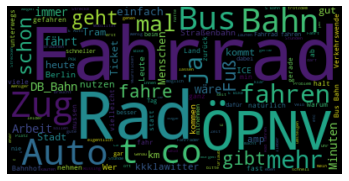

In [13]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(nltk.corpus.stopwords.words('german'))
stopwords.update(["gt", "https"])
textt = " ".join(review for review in df_selected[df_selected.lang=='de'].text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [14]:
print('Dataset size: ', len(df_selected))

Dataset size:  2512


In [15]:
df[df.lang=='de'][['text','public_metrics.like_count']].sort_values(by='public_metrics.like_count', ascending=False)['text'].iloc[9]

'@Wissing Lieber Herr @Wissing, wie wäre es mal mit einer Umweltprämie für alle Leute, die tagtäglich mit Bus, Bahn und Fahrrad unterwegs sind. Sind es nicht die, die am meisten für den Klimaschutz tun? Würde mich riesig freuen wenn diese mal für ihr Verhalten belohnt werden.'

In [16]:
df[df.lang=='de'].sort_values(by='public_metrics.like_count', ascending=False).text.to_csv('test.csv')

In [17]:
neun_euro = ['9€', '9 €', '9-€', '9 euro', '9-euro', '9euro', 'neuneuro', 'neun euro', 'neun-euro']

df_neun_euro = pd.DataFrame()
neun_euro_indices = list()

for search_text in neun_euro:
    df_tmp = df_selected[df_selected['text'].str.lower().str.contains(search_text, regex=True)]
    neun_euro_indices += list(df_tmp.index)
    
df_neun_euro['index'] = neun_euro_indices
df_neun_euro = pd.merge(df_selected, df_neun_euro.drop_duplicates(), left_index=True, right_on='index')
df_neun_euro



,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day,index
32,Seit Jahren sagen alle fahrt mehr Bahn. Bahn z...,1519322877279014913,0,1,1,0,de,2022-04-27T14:29:36.000Z,1519322877279014913,712341219716833280,[bahn rad],0,2022-04-27,468
33,"@who_is_Annett ÖPNV nutzen, falls nicht sowies...",1519549859023437826,0,0,2,0,de,2022-04-28T05:31:32.000Z,1519351136695762951,135577783,[ÖPNV Fahrrad],0,2022-04-28,576
39,Werdet Ihr das 9 Euro-Ticket nutzen? \n\nIch ü...,1519674350437285888,0,9,24,0,de,2022-04-28T13:46:13.000Z,1519674350437285888,786118815012704256,[bahn rad],0,2022-04-28,678
72,#9EuroTicket \nbin mal mit dem Fahrrad auf de...,1519906206848065536,0,0,0,0,de,2022-04-29T05:07:32.000Z,1519906206848065536,834440014658416640,[Zug Fahrrad],0,2022-04-29,807
73,#9EuroTicket: Statt superbürokratischen Lösung...,1519964009780367360,17,5,73,1,de,2022-04-29T08:57:14.000Z,1519964009780367360,33557760,[ÖPNV rad],0,2022-04-29,849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,"@friziqz @Cybso2 @PennyOrion @tagesschau Hier,...",1530148995041042434,0,1,0,0,de,2022-05-27T11:28:43.000Z,1530116418418753536,1463798876901683203,[ÖPNV Fahrrad],0,2022-05-27,8290
29,"@victorperli Wer jetzt das 9€ Ticket kauft, hä...",1530184522301591552,0,0,0,0,de,2022-05-27T13:49:54.000Z,1529383236404752384,1427607692315709463,[ÖPNV rad],0,2022-05-27,8339
109,"@keinHanuta @DB_Bahn Denke mir, das wird die V...",1530227692980916224,0,1,0,0,de,2022-05-27T16:41:26.000Z,1530211144912314369,750569514178383872,"[Zug Fahrrad, bahn Fahrrad]",0,2022-05-27,8386
30,@Cyhra1 Fahrrad oder für 9€ durch ganz D mit d...,1530435816476053506,0,0,0,0,de,2022-05-28T06:28:27.000Z,1530314066312445952,1455430509715152899,[bahn Fahrrad],0,2022-05-28,8644


In [55]:
df_selected['neun_euro_context'] = df_selected.index.isin(neun_euro_indices)

<ipython-input-55-36f7e4f6ff54>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='index'>

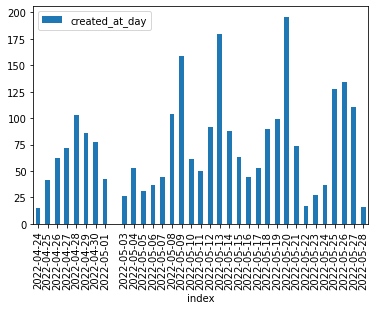

In [18]:
df_selected['created_at_day'].value_counts().reset_index().sort_values('created_at_day').plot.bar('index','created_at_day')

<AxesSubplot:xlabel='index'>

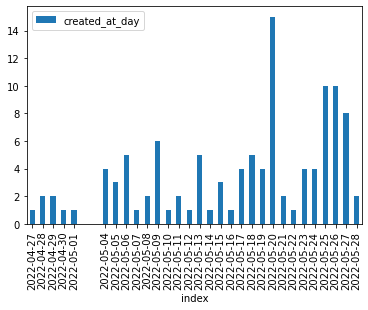

In [19]:
df_neun_euro['created_at_day'].value_counts().reset_index().sort_values('created_at_day').plot.bar('index','created_at_day')

In [20]:
df_selected[df_selected['text'].str.lower().str.contains('9euroticket', regex=True)]#['text'].to_csv('test.csv')

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
807,#9EuroTicket \nbin mal mit dem Fahrrad auf de...,1519906206848065536,0,0,0,0,de,2022-04-29T05:07:32.000Z,1519906206848065536,834440014658416640,[Zug Fahrrad],0,2022-04-29
849,#9EuroTicket: Statt superbürokratischen Lösung...,1519964009780367360,17,5,73,1,de,2022-04-29T08:57:14.000Z,1519964009780367360,33557760,[ÖPNV rad],0,2022-04-29
1626,@kkklawitter Das habe ich vor! Auch wenn ich e...,1520691597293273089,0,4,19,1,de,2022-05-01T09:08:24.000Z,1520688962519670784,1084516215970824192,[ÖPNV rad],0,2022-05-01
1848,@PRO_BAHN möchte lt. einem Bericht im @spiegel...,1521740669307478020,0,0,2,0,de,2022-05-04T06:37:02.000Z,1521740669307478020,1632345828,"[Zug Fahrrad, Zug rad]",0,2022-05-04
1891,"#9EuroTicket #sylt Schatz, da kommt keiner dra...",1521862507874377728,0,0,1,0,de,2022-05-04T14:41:11.000Z,1521862507874377728,755346315173826560,[bahn bike],0,2022-05-04
1972,@DB_Presse\n Mal ne Frage:\nWenn ich ab 1.6. i...,1522185630683480065,0,0,0,0,de,2022-05-05T12:05:09.000Z,1522185630683480065,1396530893334929408,[RE Fahrrad],0,2022-05-05
2083,Das #9EuroTicket ist als Übergangslösung sinnv...,1522504028176846848,0,0,0,0,de,2022-05-06T09:10:21.000Z,1522504028176846848,1454938627285397504,[ÖPNV ebike],0,2022-05-06
2462,"@Perowinger94 Innerorts nur noch Fahrrad, ggf....",1523236800483016704,0,0,0,0,de,2022-05-08T09:42:08.000Z,1522183056924332033,1388455907617558530,[bahn Fahrrad],0,2022-05-08
3001,Vorfreude auf das #9EuroTicket :\n\nGerade kam...,1523692988542582786,0,1,1,0,de,2022-05-09T15:54:51.000Z,1523692988542582786,6871172,[bahn rad],0,2022-05-09
3161,Ich fänd ja so ein #9EuroTicket fürs Fliegen ...,1523753450638495745,0,1,0,0,de,2022-05-09T19:55:07.000Z,1523753450638495745,2805347473,"[Zug Fahrrad, Bus Fahrrad, Zug Fahrrad]",0,2022-05-09


In [21]:
df_tmp = pd.DataFrame()
df_tmp['hastag_list'] = df_selected.text.str.findall(r'#.*?(?=\s|$)')
df_tmp['number_hastags'] = df_tmp['hastag_list'].apply(lambda x: len(x))
df_tmp = df_tmp[df_tmp.number_hastags != 0]
hashtags = list()
for i, row in df_tmp.iterrows():
    hashtags += row['hastag_list']

In [22]:
import string
from collections import Counter
hashtag_dict = Counter([s.translate(str.maketrans('', '', string.punctuation)) for s in hashtags])
{k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1])}


{'Freiburg': 1,
 'PodcastGespräch': 1,
 'franken': 1,
 'Nürnberg': 1,
 'ICEWerk': 1,
 'HamburgGewinntPlatz': 1,
 'Expertenbüchern': 1,
 'Kreisverkehre': 1,
 'Grundhaft': 1,
 'Radwege': 1,
 'dashcam': 1,
 'video': 1,
 'fußgänger': 1,
 'Roller': 1,
 'elektro': 1,
 'pkw': 1,
 'lkw': 1,
 'MDRZA': 1,
 'bscyb': 1,
 'ybforever': 1,
 'ewb': 1,
 'carrera': 1,
 'Rosenthal': 1,
 'Fundservice': 1,
 'Pendeln': 1,
 'EnergieUnabhängigkeit': 1,
 'Verkehrsarten': 1,
 'UkraineKrieg': 1,
 'AFDMOL': 1,
 'AfDKreisverbandMärkischOderland': 1,
 'GreatReset': 1,
 'Klimawandel': 1,
 'Energiekrise': 1,
 'Ukraine': 1,
 'Krieg': 1,
 'Ölimport': 1,
 'Klimademo': 1,
 'IchPrangereDasAn': 1,
 'Luxemburg': 1,
 'Verkehrskonzept': 1,
 'TramNetz': 1,
 'dbconnect': 1,
 'Kalkar': 1,
 'nimmsrad': 1,
 'Aachen': 1,
 'Parkgebühren': 1,
 'Parkplätze': 1,
 'Bremen': 1,
 'hvv': 1,
 'fahrradstadt': 1,
 'AlmancaKursA1': 1,
 'deutschtuerkish': 1,
 'ilticaALMANYA': 1,
 'germanexercise': 1,
 'DeutschÜbung': 1,
 'deutscha1': 1,
 'LernD

In [23]:
df_selected[df_selected.text.str.contains('preis')]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
55,@ChrischmiDE @Reiner_Kolberg @FahrradClub Vorb...,1518297164576923648,0,0,1,0,de,2022-04-24T18:33:47.000Z,1518224733023752192,1295504335120617472,[Straßenbahn rad],0,2022-04-24
576,"@who_is_Annett ÖPNV nutzen, falls nicht sowies...",1519549859023437826,0,0,2,0,de,2022-04-28T05:31:32.000Z,1519351136695762951,135577783,[ÖPNV Fahrrad],0,2022-04-28
895,@Aliverable @vecci2000 @DashcamLeipzig Mich kö...,1519996563975819264,0,0,0,0,de,2022-04-29T11:06:35.000Z,1519049499930505216,177920327,[ÖPNV rad],0,2022-04-29
1333,@PTNisWarCrmnl @kkklawitter @FridaysBad Wie wo...,1520503532889202689,0,0,1,0,de,2022-04-30T20:41:06.000Z,1511282321122545668,1169892501282406400,[bahn rad],0,2022-04-30
2277,#Putin und #Automobil-Konzerne hassen diesen T...,1522875501303549952,0,1,3,0,de,2022-05-07T09:46:27.000Z,1522875501303549952,3183235300,[Bus rad],0,2022-05-07
2459,@ChristianDaheim @cycling_ann @WDR Darum ging ...,1523232623518437377,0,1,3,0,de,2022-05-08T09:25:32.000Z,1522992645832048640,2951598761,[Bus rad],0,2022-05-08
4244,@LukasIlgner Da wir demnächst alle elektrisch ...,1525043000686039041,0,3,0,0,de,2022-05-13T09:19:19.000Z,1524727120236318723,21096650,[ÖPNV rad],0,2022-05-13
4612,@Perowinger94 @AKress84 Den Normalpreis finde ...,1525392482804109312,0,1,3,0,de,2022-05-14T08:28:02.000Z,1525373661120802816,1044486967101206528,[bahn rad],0,2022-05-14
5635,#Spritpreisbremse ist gut für:\n- #Putin\n- Re...,1526943699380457474,1,0,3,0,de,2022-05-18T15:12:01.000Z,1526943699380457474,1191819239990190080,[ÖPNV rad],0,2022-05-18
5864,@a_sator @martin_blum Recht einseitige Betrach...,1527291684861648896,0,0,0,0,de,2022-05-19T14:14:48.000Z,1526918857386082304,2515182600,[ÖPNV rad],0,2022-05-19


In [32]:
df_selected['text_altered'] = df_selected.text.str.replace(r'http\S+', '', regex=True)
df_selected['text_altered'] = df_selected.text_altered.str.replace(r'@\S+', '', regex=True)

<ipython-input-32-682e876f37f8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-682e876f37f8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



@InProceedings{guhr-EtAl:2020:LREC,
  author    = {Guhr, Oliver  and  Schumann, Anne-Kathrin  and  Bahrmann, Frank  and  Böhme, Hans Joachim},
  title     = {Training a Broad-Coverage German Sentiment Classification Model for Dialog Systems},
  booktitle      = {Proceedings of The 12th Language Resources and Evaluation Conference},
  month          = {May},
  year           = {2020},
  address        = {Marseille, France},
  publisher      = {European Language Resources Association},
  pages     = {1620--1625},
  url       = {https://www.aclweb.org/anthology/2020.lrec-1.202.pdf}
}

In [26]:
from germansentiment import SentimentModel

model = SentimentModel()

texts = [
    "Mit keinem guten Ergebniss","Das ist gar nicht mal so gut",
    "Total awesome!","nicht so schlecht wie erwartet",
    "Der Test verlief positiv.","Sie fährt ein grünes Auto."]
       
result = model.predict_sentiment(texts)
print(result)

['negative', 'negative', 'positive', 'positive', 'neutral', 'neutral']


In [40]:
texts = list(df_selected['text_altered'])#[:5]
result = model.predict_sentiment(texts)
print(result)

['neutral', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'negative'

In [42]:
df_selected['sentiments'] = result

<ipython-input-42-ead078d68a29>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df_selected[['sentiments', 'text_altered']].to_csv('test.csv')

In [57]:
df_selected['neun_euro_context']

6       False
7       False
10      False
11      False
12      False
        ...  
8779    False
8816    False
8839     True
8840    False
8855    False
Name: neun_euro_context, Length: 2512, dtype: bool

Verhältnis pos zu neg 
ges 17 %
9 € 6 %

In [59]:
df_selected.sentiments.value_counts()

neutral     1366
negative     948
positive     198
Name: sentiments, dtype: int64

In [58]:
df_selected[df_selected['neun_euro_context']].sentiments.value_counts()

neutral     67
negative    41
positive     3
Name: sentiments, dtype: int64

In [29]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

KeyError: 'sentiment'

In [ ]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()